In [1]:
from solver import Solver, Region
from numpy import random
import pickle
import os.path as path
import numpy as np 
from bioproc.proc_models import *   
from bioproc.proc_opt import *
from bioproc.hill_functions import *  
import matplotlib.pyplot as plt 
from scipy.integrate import odeint 
import os.path 
from deap import creator, base, tools, algorithms    

In [3]:
def from_addr_to_i(addr):
    if addr == [0,0,0]:
        return "i1"
    elif addr == [1,0,0]:
        return "i2"
    elif addr == [1,1,0]:
        return "i3"
    elif addr == [1,1,1]:
        return "i4"
    elif addr == [0,1,1]:
        return "i5"
    else:
        return "i6"

In [4]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Candidate", list, fitness=creator.FitnessMax)
toolbox = base.Toolbox()
toolbox.register("candidate", Solver.generateCandidate) 

In [5]:
file =  os.path.join(".", "bioproc", "one_bit_model", "bioprocViableSet_IterGA.p")    
viablePoints1 = np.array(pickle.load(open(file, "rb")))     
number1 = np.size(viablePoints1, 0) 
rndPoints = np.array(np.random.randint(number1, size=20)) 
points1 = viablePoints1[rndPoints]

In [6]:
file =  os.path.join(".", "bioproc", "two_bit_model", "bioprocViableSet_IterGA.p")    
viablePoints2 = np.array(pickle.load(open(file, "rb")))     
number2 = np.size(viablePoints2, 0) 
rndPoints = np.array(np.random.randint(number2, size=20)) 
points2 = viablePoints2[rndPoints]

In [7]:
file =  os.path.join(".", "bioproc", "three_bit_model", "bioprocViableSet_IterGA.p")    
viablePoints3 = np.array(pickle.load(open(file, "rb")))     
number3 = np.size(viablePoints3, 0) 
rndPoints = np.array(np.random.randint(number3, size=20)) 
points3 = viablePoints3[rndPoints]

In [8]:
number = np.array([number1, number2, number3])
points = np.array([points1, points2, points3])
viablePoints = np.array([viablePoints1, viablePoints2, viablePoints3])

In [9]:
dt = 0.001 
T = 192 #hours 
N = int(T/dt)    
ts = np.linspace(0, T, N)   


clk = get_clock(ts)

In [28]:
def plot_points(axes, points, params_jump, jump_src, jump_dst, condition = False, fig_name = "", plot_clock=True, plot_q = False):
    
    i_src = from_addr_to_i(jump_src)
    i_dst = from_addr_to_i(jump_dst)
    print(i_src)
    print(i_dst)
        
    for a,p in zip(axes, points):
        
        params_ff = np.concatenate([p[0:8], params_jump])

        params_addr = p[8:]  
        
        
        y0 = np.array([0]*18)  
        if condition:
            Y = odeint(three_bit_processor_ext_RS_cond, y0, ts, args=(params_ff, params_addr,jump_src, jump_dst, i_src, i_dst, condition)) 
        else:
            Y = odeint(three_bit_processor_ext_RS, y0, ts, args=(params_ff, params_addr,jump_src, jump_dst, i_src, i_dst)) 
        
        i1 = Y[:,-6]         
        i2 = Y[:,-5]        
        i3 = Y[:,-4]  
        i4 = Y[:,-3]   
        i5 = Y[:,-2]   
        i6 = Y[:,-1]   

        q1 = Y[:,2]       
        q2 = Y[:,6]        
        q3 = Y[:,10]


        a.plot(ts, i1, label='i1')
        a.plot(ts, i2, label='i2')
        a.plot(ts, i3, label='i3')
        a.plot(ts, i4, label='i4')
        a.plot(ts, i5, label='i5')
        a.plot(ts, i6, label='i6')
        if plot_q:
            a.plot(ts, q1, label='q1') 
            a.plot(ts, q2, label='q2') 
            a.plot(ts, q3, label='q3') 
        if plot_clock:
            a.plot(ts, clk, 'k', alpha=0.5, label='clk') 
        if condition:
            a.plot(ts, conc_condition, label='condition')
                
        a.set_xlabel("time [h]")
        a.legend(loc='upper left')       
        
            
            
    axes[0].set_ylabel("Concetrations")
    plt.gcf().set_size_inches(15,5)
    
    
    if condition:
        plt.savefig('figs\\proc_cond_jump_'+fig_name+i_src+'_'+i_dst+'_ODE.pdf', bbox_inches = 'tight')
        np.savetxt('figs\\proc_cond_jump_'+fig_name+i_src+'_'+i_dst+'.txt', points)
    else:
        plt.savefig('figs\\proc_jump_'+fig_name+i_src+'_'+i_dst+'_ODE.pdf', bbox_inches = 'tight')
        np.savetxt('figs\\proc_jump_'+fig_name+i_src+'_'+i_dst+'.txt', points)
    plt.show()
    
        
        
    

## Plot feasible solutions 
Make plots and save them to ```/figs``` folder together with the parameter values

In [29]:
# proteolytic degradation parameters
KM = 1
deltaE = 10
params_jump = [deltaE, KM]

In [30]:
points = np.loadtxt('selected_points.txt')
#"""
#rndPoints = np.array(np.random.randint(number, size=3)) 
#points = viablePoints[rndPoints]
"""
points = np.zeros((3,12))
points[0] = np.array([15.58143736,  2.52191547, 24.35646122, 36.12683424,  0.20222387,
        0.49614202, 17.01689959,  5.        , 44.03567633,  0.73364135,
       34.36351963,  5.        ])
points[1] = np.array([22.2671994 ,  1.18996768, 19.63390149, 50.        ,  0.1363039 ,
        0.63673455, 15.57853452,  5.        , 44.03567633,  0.50692637,
       44.70747897,  4.3451446 ])
points[2] = np.array([16.74008136,  1.62909229, 21.85285782, 50.        ,  0.1363039 ,
        0.63673455, 20.60897531,  5.        , 50.        ,  1.05733658,
       29.64970147,  5.        ])
np.savetxt('selected_points.txt', points)
"""

"\npoints = np.zeros((3,12))\npoints[0] = np.array([15.58143736,  2.52191547, 24.35646122, 36.12683424,  0.20222387,\n        0.49614202, 17.01689959,  5.        , 44.03567633,  0.73364135,\n       34.36351963,  5.        ])\npoints[1] = np.array([22.2671994 ,  1.18996768, 19.63390149, 50.        ,  0.1363039 ,\n        0.63673455, 15.57853452,  5.        , 44.03567633,  0.50692637,\n       44.70747897,  4.3451446 ])\npoints[2] = np.array([16.74008136,  1.62909229, 21.85285782, 50.        ,  0.1363039 ,\n        0.63673455, 20.60897531,  5.        , 50.        ,  1.05733658,\n       29.64970147,  5.        ])\nnp.savetxt('selected_points.txt', points)\n"

In [31]:
rndPoints = np.array(np.random.randint(number[2], size=3)) 
points = viablePoints[2][rndPoints]

### Unconditional jump

i4
i5


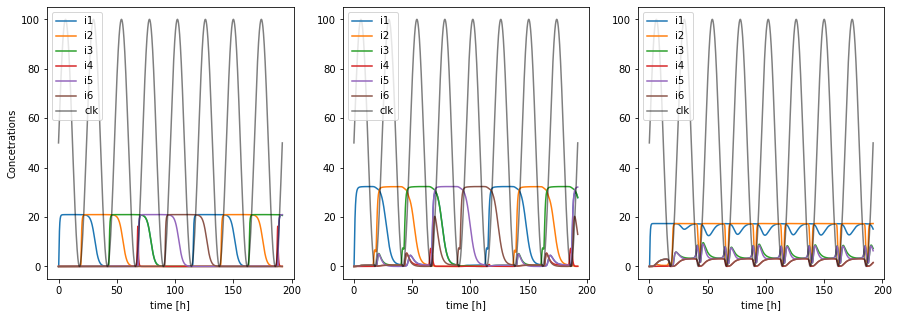

In [32]:
jump_src=[1,1,1]
jump_dst = [0,1,1]
ax1=plt.subplot(1, 3, 1)
ax2=plt.subplot(1, 3, 2, sharey = ax1)
ax3=plt.subplot(1, 3, 3, sharey = ax1)
plot_points([ax1, ax2, ax3], points[:3], params_jump, jump_src, jump_dst)

### Halt

i5
i4


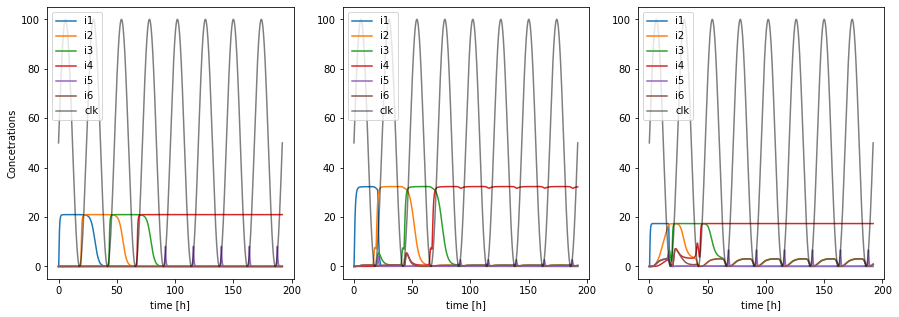

In [33]:
jump_src=[0,1,1]
jump_dst = [1,1,1]
ax1=plt.subplot(1, 3, 1)
ax2=plt.subplot(1, 3, 2, sharey = ax1)
ax3=plt.subplot(1, 3, 3, sharey = ax1)
plot_points([ax1, ax2, ax3], points[:3], params_jump, jump_src, jump_dst, fig_name = "halt_")

### Do-While

i5
i4


C:\Users\miham\.conda\envs\opt\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


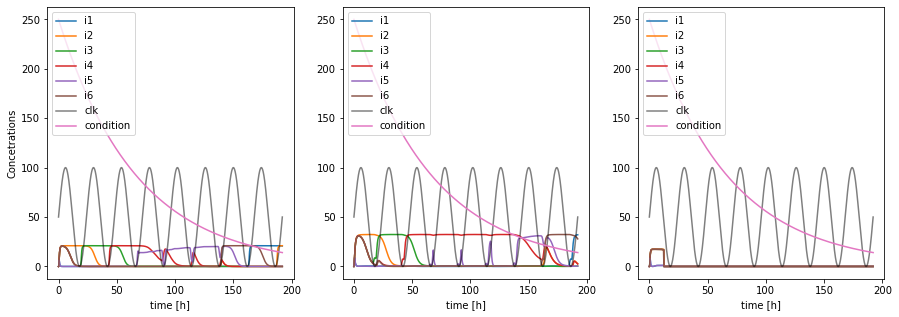

In [34]:
x0_cond = 250
delta_cond = 0.015
KD_cond = 150
condition_type = "induction"
#n_cond = 1
#condition = (x0_cond, delta_cond, KD_cond, n_cond)
condition = (x0_cond, delta_cond, KD_cond, condition_type)
conc_condition = get_condition(x0_cond, delta_cond, ts)


jump_src=[0,1,1]
jump_dst = [1,1,1]
ax1=plt.subplot(1, 3, 1)
ax2=plt.subplot(1, 3, 2, sharey = ax1)
ax3=plt.subplot(1, 3, 3, sharey = ax1)
plot_points([ax1, ax2, ax3], points[:3], params_jump, jump_src, jump_dst, condition, fig_name = "loop_")

### Basic jump (jump if inducer is present)

Case 1: condition is fulfilled

i4
i5


C:\Users\miham\.conda\envs\opt\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


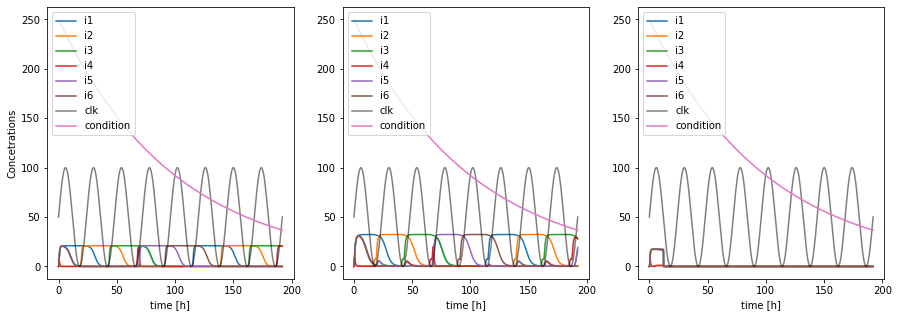

In [35]:
x0_cond = 250
delta_cond = 0.01
KD_cond = 150
condition_type = "induction"
#n_cond = 1
#condition = (x0_cond, delta_cond, KD_cond, n_cond)
condition = (x0_cond, delta_cond, KD_cond, condition_type)
conc_condition = get_condition(x0_cond, delta_cond, ts)

#jump_src=[1,1,1]
#jump_dst = [0,0,1]
jump_src=[1,1,1]
jump_dst = [0,1,1]
ax1=plt.subplot(1, 3, 1)
ax2=plt.subplot(1, 3, 2, sharey = ax1)
ax3=plt.subplot(1, 3, 3, sharey = ax1)
plot_points([ax1, ax2, ax3], points[:3], params_jump, jump_src, jump_dst, condition, fig_name='jump_true_')

Case 2: condition is not fulfilled

i4
i5


C:\Users\miham\.conda\envs\opt\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


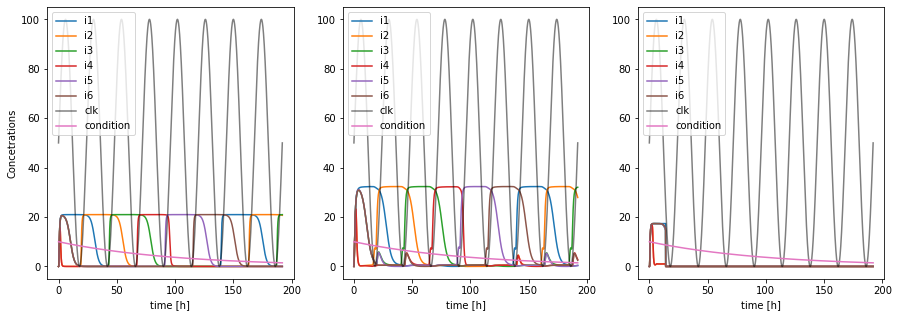

In [36]:
x0_cond = 10
delta_cond = 0.01
KD_cond = 150
condition_type = "induction"
#n_cond = 1
#condition = (x0_cond, delta_cond, KD_cond, n_cond)
condition = (x0_cond, delta_cond, KD_cond, condition_type)
conc_condition = get_condition(x0_cond, delta_cond, ts)


#jump_src=[1,1,1]
#jump_dst = [0,0,1]
jump_src=[1,1,1]
jump_dst = [0,1,1]
ax1=plt.subplot(1, 3, 1)
ax2=plt.subplot(1, 3, 2, sharey = ax1)
ax3=plt.subplot(1, 3, 3, sharey = ax1)
plot_points([ax1, ax2, ax3], points[:3], params_jump, jump_src, jump_dst, condition, fig_name='jump_false_')

### If (jump if inhibitor is absent)

Case 1: condition is not fulfilled

i4
i5


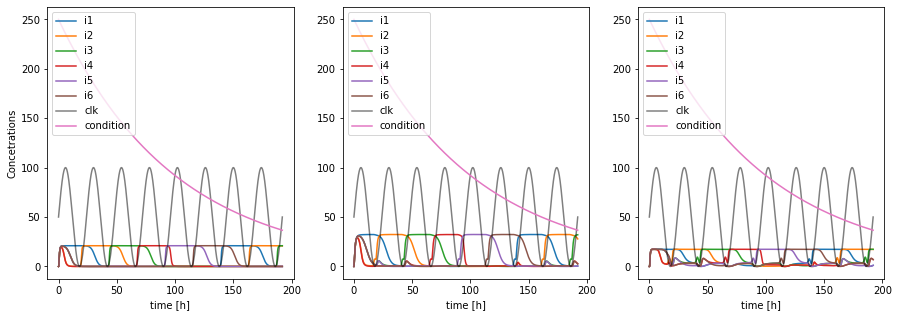

In [37]:
x0_cond = 250
delta_cond = 0.01
KD_cond = 2
condition_type = "inhibition"
#n_cond = 1
#condition = (x0_cond, delta_cond, KD_cond, n_cond)
condition = (x0_cond, delta_cond, KD_cond, condition_type)
conc_condition = get_condition(x0_cond, delta_cond, ts)

#jump_src=[1,1,1]
#jump_dst = [0,0,1]
jump_src=[1,1,1]
jump_dst = [0,1,1]
ax1=plt.subplot(1, 3, 1)
ax2=plt.subplot(1, 3, 2, sharey = ax1)
ax3=plt.subplot(1, 3, 3, sharey = ax1)
plot_points([ax1, ax2, ax3], points[:3], params_jump, jump_src, jump_dst, condition, fig_name='if_true_')

Case 2: condition is fulfilled

i4
i5


C:\Users\miham\.conda\envs\opt\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


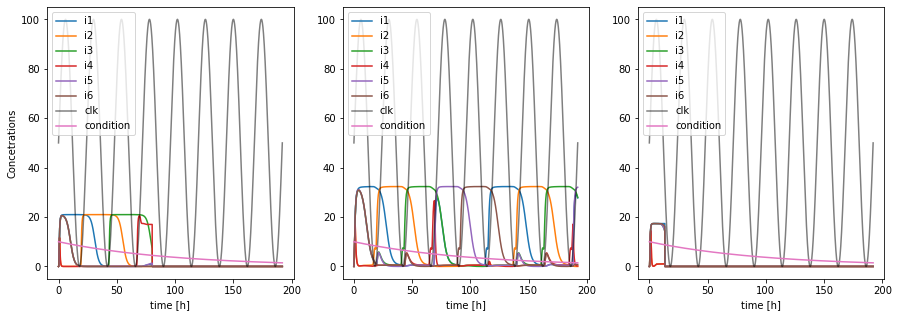

In [38]:
x0_cond = 10
delta_cond = 0.01
KD_cond = 2
condition_type = "inhibition"
#n_cond = 1
#condition = (x0_cond, delta_cond, KD_cond, n_cond)
condition = (x0_cond, delta_cond, KD_cond, condition_type)
conc_condition = get_condition(x0_cond, delta_cond, ts)


#jump_src=[1,1,1]
#jump_dst = [0,0,1]
jump_src=[1,1,1]
jump_dst = [0,1,1]
ax1=plt.subplot(1, 3, 1)
ax2=plt.subplot(1, 3, 2, sharey = ax1)
ax3=plt.subplot(1, 3, 3, sharey = ax1)
plot_points([ax1, ax2, ax3], points[:3], params_jump, jump_src, jump_dst, condition, fig_name='if_false_')

## Testing random points

In [27]:
rndPoint = np.random.randint(number, size=1)
point = viablePoints[rndPoint]

IndexError: index 556 is out of bounds for axis 0 with size 3

i4
i5


C:\Users\miham\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:48: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
C:\Users\miham\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:48: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
C:\Users\miham\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:48: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
C:\Users\miham\AppData\Roaming\Python\Python37\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


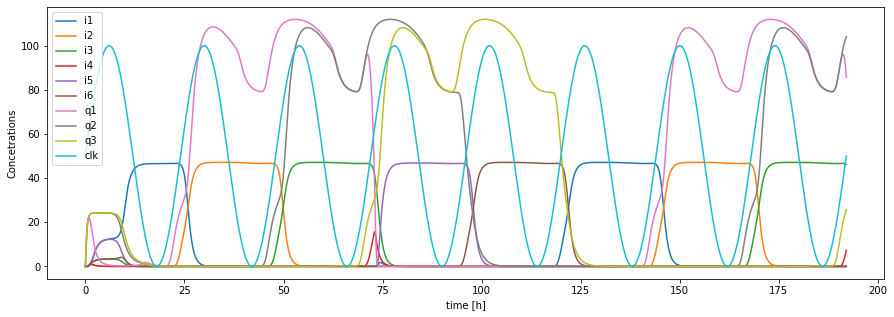

In [63]:
ax1=plt.subplot(1, 1, 1)
plot_points([ax1],point, params_jump, jump_src, jump_dst, )

In [64]:
point[0]

array([16.74008136,  1.62909229, 21.85285782, 50.        ,  0.1363039 ,
        0.63673455, 20.60897531,  5.        , 50.        ,  1.05733658,
       29.64970147,  5.        ])

[11338]
i5
i4


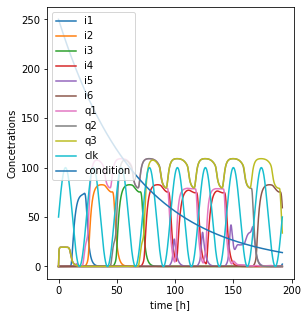

array([22.2671994 ,  1.18996768, 19.63390149, 50.        ,  0.1363039 ,
        0.63673455, 15.57853452,  5.        , 44.03567633,  0.50692637,
       44.70747897,  4.3451446 ])

In [136]:
rndPoint = np.random.randint(number, size=1)
print(rndPoint)
point = viablePoints[rndPoint]

x0_cond = 250
delta_cond = 0.015
KD_cond = 150
#n_cond = 1
#condition = (x0_cond, delta_cond, KD_cond, n_cond)
condition = (x0_cond, delta_cond, KD_cond)
conc_condition = get_condition(x0_cond, delta_cond, ts)

jump_src=[0,1,1]
jump_dst = [1,1,1]
ax1=plt.subplot(1, 3, 1)
plot_points([ax1], point, params_jump, jump_src, jump_dst, condition)

point[0]

i4
i5


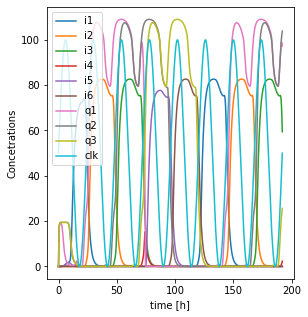

In [137]:
jump_src=[1,1,1]
jump_dst = [0,1,1]
ax1=plt.subplot(1, 3, 1)
plot_points([ax1], point, params_jump, jump_src, jump_dst)

i5
i4


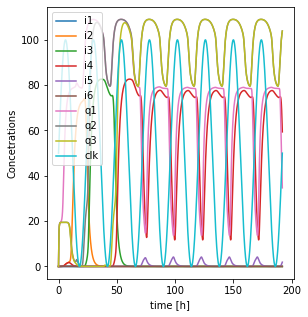

In [138]:
jump_src=[0,1,1]
jump_dst = [1,1,1]
ax1=plt.subplot(1, 3, 1)
plot_points([ax1], point, params_jump, jump_src, jump_dst)